<a href="https://colab.research.google.com/github/omkar1872/Machine-Learning-Projects/blob/main/Using_Multi_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load dataset
df = pd.read_csv("/content/framingham.csv")

# Display first few rows
print(df.head())

# Check dataset structure
print(df.info())

# Check for missing values
print(df.isnull().sum())


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [3]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify if all missing values are handled
print(f"Remaining missing values: {df.isnull().sum().sum()}")


Remaining missing values: 0


In [4]:
# Selecting important features
X = df[["age", "cigsPerDay", "totChol", "glucose", "male", "sysBP"]]
y = df["TenYearCHD"]


In [5]:
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 2560, Testing samples: 1098


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Select the correct dataset (scaled or unscaled)
    X_train_data, X_test_data = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "SVM", "KNN"] else (X_train, X_test)

    # Train and predict
    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)

    # Store accuracy
    results[name] = accuracy_score(y_test, y_pred)

    # Print results
    print(f"{name} Accuracy: {results[name]:.4f}\n{classification_report(y_test, y_pred)}\n" + "-" * 50)


Training Logistic Regression...
Logistic Regression Accuracy: 0.8552
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.65      0.10      0.18       167

    accuracy                           0.86      1098
   macro avg       0.76      0.55      0.55      1098
weighted avg       0.83      0.86      0.81      1098

--------------------------------------------------
Training SVM...
SVM Accuracy: 0.8479
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       931
           1       0.00      0.00      0.00       167

    accuracy                           0.85      1098
   macro avg       0.42      0.50      0.46      1098
weighted avg       0.72      0.85      0.78      1098

--------------------------------------------------
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.8452
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       931
           1       0.46      0.11      0.17       167

    accuracy                           0.85      1098
   macro avg       0.66      0.54      0.54      1098
weighted avg       0.80      0.85      0.80      1098

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.7723
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       931
           1       0.28      0.32      0.30       167

    accuracy                           0.77      1098
   macro avg       0.58      0.59      0.58      1098
weighted avg       0.79      0.77      0.78      1098

--------------------------------------------------
Training KNN...
KNN Accuracy: 0.8324
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       931
          

In [8]:
best_model = max(results, key=results.get)
print(f"Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Best Model: Logistic Regression with Accuracy: 0.8552


<ipython-input-16-9ebbf39d2257>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis", width=0.6)


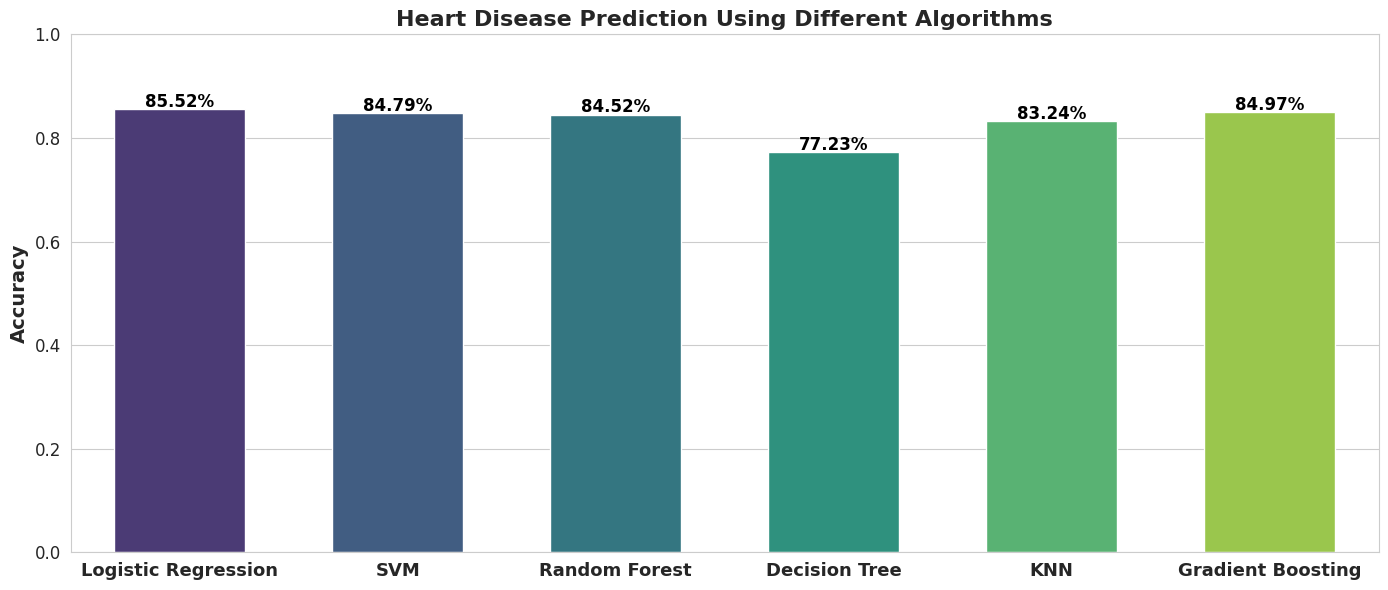

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis", width=0.6)

# Add accuracy labels on top of each bar
for i, acc in enumerate(results.values()):
    ax.text(i, acc + 0.005, f"{acc*100:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Formatting the plot
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Heart Disease Prediction Using Different Algorithms", fontsize=16, fontweight='bold')  # Updated Title
plt.ylim(0, 1)
plt.tight_layout()

# Save the figure as a high-quality image
plt.savefig("heart_disease_prediction.png", dpi=300, bbox_inches='tight')  # Saves with high resolution
plt.show()
